<a href="https://colab.research.google.com/github/SaiRithik24/AD/blob/main/traff_acci_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [15]:
# Load dataset
df = pd.read_csv('TrafficAccidents.csv')
df.isnull()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145217,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
145218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
145219,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
145220,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df.fillna(0)
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680,178240,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170,181650,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520,182240,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900,177530,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060,179040,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145217,201001ZT80435,525680,163130,-0.196524,51.353297,1,3,2,1,23/12/2010,...,0,0,1,1,4,0,0,1,1,E01004155
145218,201001ZT80436,528610,164760,-0.153881,51.367291,1,3,2,1,24/11/2010,...,0,5,1,1,1,0,0,1,2,E01004172
145219,201001ZT80444,523860,161100,-0.223353,51.335452,1,3,2,4,09/12/2010,...,0,0,4,1,1,0,0,1,2,E01004114
145220,201001ZT80445,524620,165430,-0.210933,51.374202,1,3,2,1,11/12/2010,...,0,0,4,1,1,0,0,1,1,E01004131


In [3]:
# Data Preprocessing
df["Light_Conditions"].fillna("Unknown", inplace=True)
df["Junction_Detail"].fillna("Unknown", inplace=True)
df["Road_Type"].fillna("Unknown", inplace=True)

df["Accident_Severity_Label"] = df["Accident_Severity"].map({1: "Fatal", 2: "Serious", 3: "Slight"})

le = LabelEncoder()
df["Severity_Encoded"] = le.fit_transform(df["Accident_Severity_Label"])

<ipython-input-3-c75a994ce64d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Light_Conditions"].fillna("Unknown", inplace=True)
<ipython-input-3-c75a994ce64d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [19]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
df.corr(numeric_only=True)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_District,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Location_Easting_OSGR,1.000000,0.050801,0.999808,0.017056,0.023415,0.004672,-0.010016,0.011794,0.001223,-0.031902,...,-0.081443,0.010375,-0.007336,-0.003799,0.015807,-0.002983,0.000468,0.007138,0.071877,0.025537
Location_Northing_OSGR,0.050801,1.000000,0.070330,0.999428,0.010662,0.020832,0.003376,0.018366,-0.008278,0.038457,...,0.011895,0.009947,-0.017721,0.006060,0.005855,-0.028493,-0.002728,-0.005179,0.043385,0.020785
Longitude,0.999808,0.070330,1.000000,0.036614,0.023588,0.005085,-0.009901,0.012144,0.001065,-0.031127,...,-0.081143,0.010567,-0.007679,-0.003686,0.015902,-0.003580,0.000419,0.007033,0.072589,0.025934
Latitude,0.017056,0.999428,0.036614,1.000000,0.010032,0.020680,0.003603,0.017863,-0.008333,0.039647,...,0.014733,0.009603,-0.017264,0.006220,0.005286,-0.028472,-0.002733,-0.005439,0.040548,0.019942
Police_Force,0.023415,0.010662,0.023588,0.010032,1.000000,-0.001175,-0.026720,-0.016947,-0.000424,0.988940,...,0.011482,-0.000672,0.070214,-0.008653,-0.007049,-0.009381,0.033007,0.015072,-0.017673,0.007603
Accident_Severity,0.004672,0.020832,0.005085,0.020680,-0.001175,1.000000,0.097240,-0.065928,-0.003926,0.002007,...,0.003022,-0.012519,-0.026656,-0.051263,-0.004739,-0.000328,-0.007965,-0.007195,-0.012381,0.095957
Number_of_Vehicles,-0.010016,0.003376,-0.009901,0.003603,-0.026720,0.097240,1.000000,0.195134,-0.010748,-0.016333,...,0.000088,-0.013177,-0.069273,-0.011550,0.001146,0.003473,-0.019282,-0.030971,0.044373,0.045539
Number_of_Casualties,0.011794,0.018366,0.012144,0.017863,-0.016947,-0.065928,0.195134,1.000000,-0.008399,-0.007026,...,-0.005119,0.001546,0.000803,0.054497,0.013955,0.031263,0.002482,0.010387,0.061730,-0.080694
Day_of_Week,0.001223,-0.008278,0.001065,-0.008333,-0.000424,-0.003926,-0.010748,-0.008399,1.000000,-0.000688,...,-0.003781,-0.001607,0.001626,0.010501,-0.000758,-0.009503,-0.001667,-0.001479,-0.007263,-0.006007
Local_Authority_District,-0.031902,0.038457,-0.031127,0.039647,0.988940,0.002007,-0.016333,-0.007026,-0.000688,1.000000,...,0.002866,-0.001837,0.050207,-0.010384,-0.005176,-0.005053,0.030261,0.014195,-0.002909,0.008049


In [23]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()
df_encoded = OneHotEncoder.fit_transform(df)
print(df_encoded)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4647104 stored elements and shape (145222, 340419)>
  Coords	Values
  (0, 0)	1.0
  (0, 147375)	1.0
  (0, 152597)	1.0
  (0, 182654)	1.0
  (0, 278352)	1.0
  (0, 331013)	1.0
  (0, 331016)	1.0
  (0, 331018)	1.0
  (0, 331030)	1.0
  (0, 331260)	1.0
  (0, 333237)	1.0
  (0, 334301)	1.0
  (0, 334690)	1.0
  (0, 334731)	1.0
  (0, 334746)	1.0
  (0, 335116)	1.0
  (0, 335168)	1.0
  (0, 335174)	1.0
  (0, 335179)	1.0
  (0, 335188)	1.0
  (0, 335193)	1.0
  (0, 335200)	1.0
  (0, 335615)	1.0
  (0, 335619)	1.0
  (0, 335624)	1.0
  :	:
  (145221, 331019)	1.0
  (145221, 331030)	1.0
  (145221, 332693)	1.0
  (145221, 333237)	1.0
  (145221, 333674)	1.0
  (145221, 334699)	1.0
  (145221, 334740)	1.0
  (145221, 334746)	1.0
  (145221, 334869)	1.0
  (145221, 335168)	1.0
  (145221, 335174)	1.0
  (145221, 335182)	1.0
  (145221, 335192)	1.0
  (145221, 335197)	1.0
  (145221, 335200)	1.0
  (145221, 335615)	1.0
  (145221, 335618)	1.0
  (145221, 335624)	1.0
  (14

In [24]:
from sklearn.preprocessing import MinMaxScaler
numerical_features = df.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df[numerical_features])

        Location_Easting_OSGR  Location_Northing_OSGR  Longitude  Latitude  \
0                    0.383907                0.493973   0.383226  0.496886   
1                    0.357664                0.570089   0.358547  0.573838   
2                    0.363747                0.583259   0.364855  0.586819   
3                    0.405109                0.478125   0.404024  0.480358   
4                    0.425269                0.511830   0.424746  0.513420   
...                       ...                     ...        ...       ...   
145217               0.383907                0.156696   0.376793  0.159564   
145218               0.434828                0.193080   0.428034  0.194325   
145219               0.352277                0.111384   0.344554  0.115237   
145220               0.365485                0.208036   0.359478  0.211491   
145221               0.428224                0.246429   0.422514  0.247894   

        Police_Force  Accident_Severity  Number_of_Vehicles  \


In [4]:
# Feature Selection
features = ["Number_of_Vehicles", "Light_Conditions", "Junction_Detail", "Road_Type", "Speed_limit"]
X = df[features]
y = df["Severity_Encoded"]

X_encoded = pd.get_dummies(X, drop_first=True)

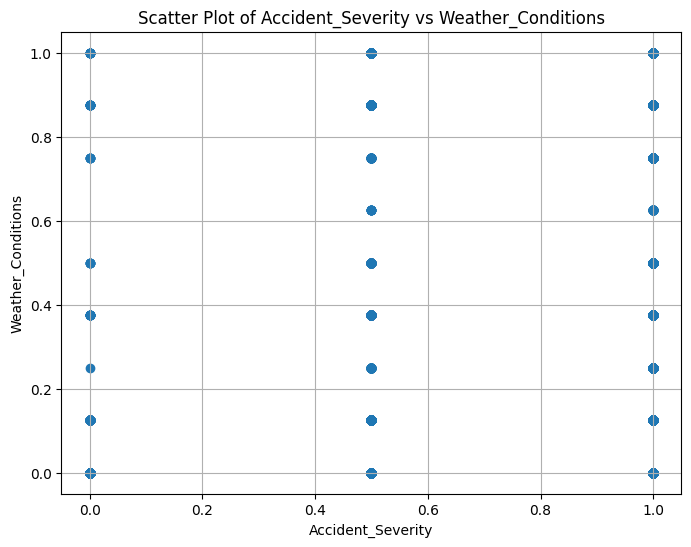

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Accident_Severity'], df['Weather_Conditions'])
plt.xlabel('Accident_Severity')
plt.ylabel('Weather_Conditions')
plt.title('Scatter Plot of Accident_Severity vs Weather_Conditions')
plt.grid(True)

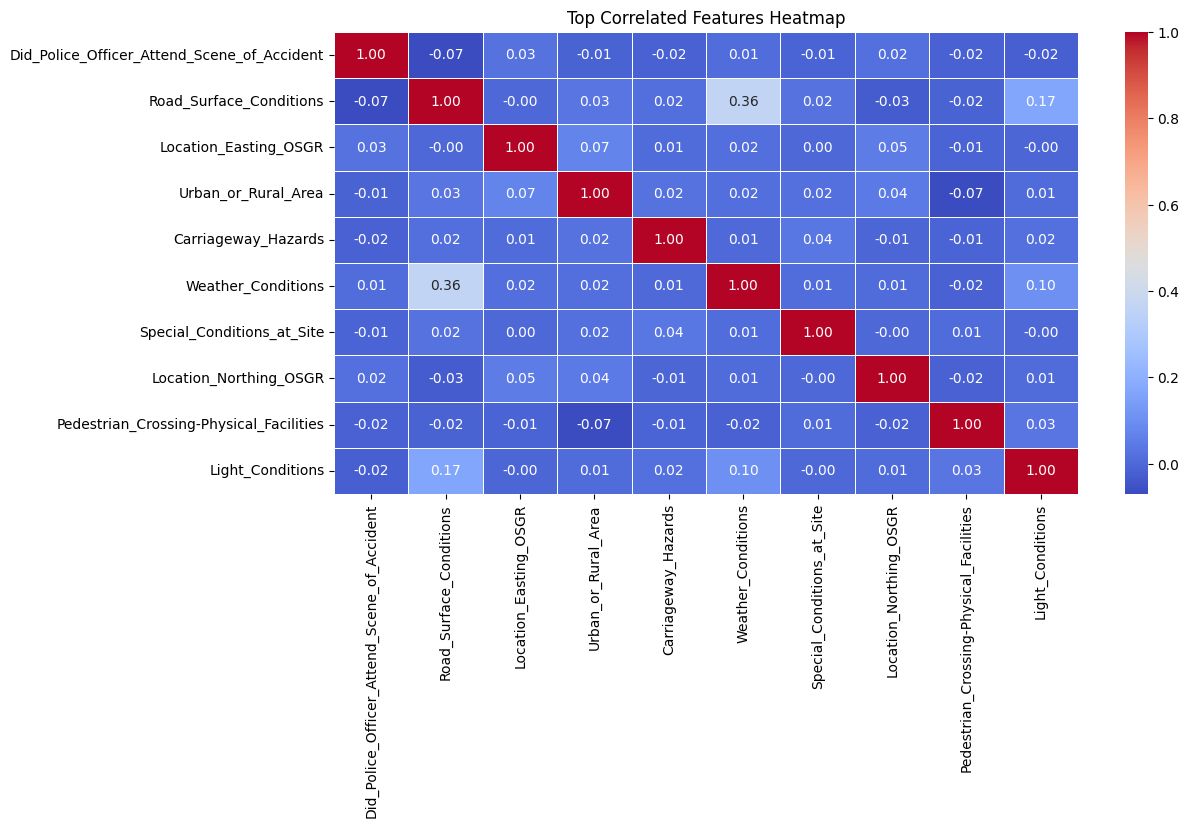

In [22]:
# Heatmap
numeric_df = df.select_dtypes(include=[np.number])
top_corr_features = numeric_df.corr().abs().unstack().sort_values(ascending=False)
top_features = list(set(top_corr_features.index.get_level_values(0)[:10]))
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Top Correlated Features Heatmap")
plt.show()

<Figure size 1000x500 with 0 Axes>

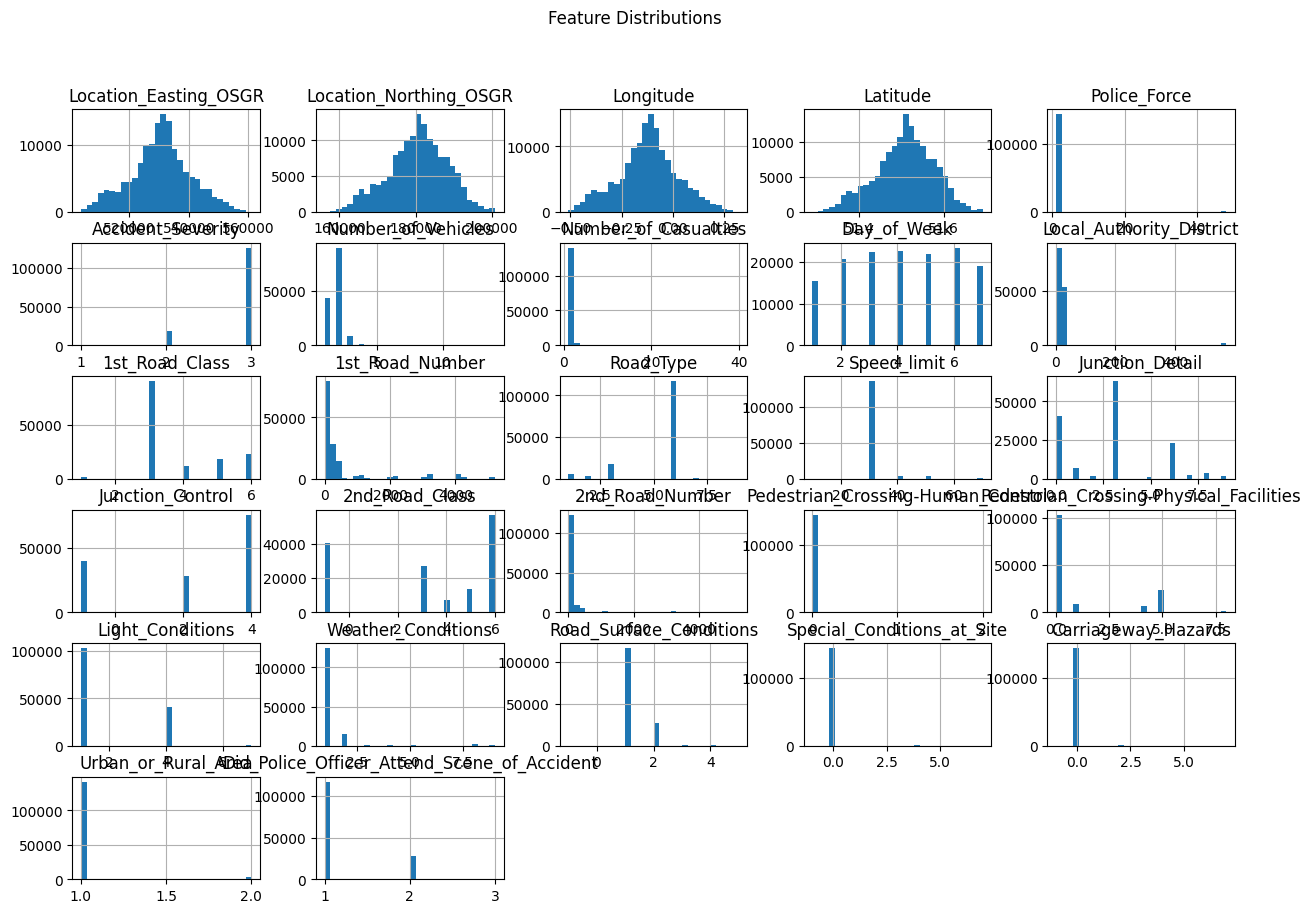

In [20]:
# EDA
plt.figure(figsize=(10, 5))
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

In [5]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=6)
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_dt_pred)}")

Decision Tree Accuracy: 0.8664141848855225


In [7]:
# Logistic Regression Model
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))



Logistic Regression Accuracy: 0.8666207608882768
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.00      0.00      0.00      3658
           2       0.87      1.00      0.93     25171

    accuracy                           0.87     29045
   macro avg       0.29      0.33      0.31     29045
weighted avg       0.75      0.87      0.80     29045



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
# Random Forest Model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Classification Report:\n", classification_report(y_test, y_pred_rfc))


Random Forest Accuracy: 0.8654157342055431
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.20      0.00      0.01      3658
           2       0.87      1.00      0.93     25171

    accuracy                           0.87     29045
   macro avg       0.35      0.33      0.31     29045
weighted avg       0.78      0.87      0.80     29045



In [9]:

# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:23:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.865932174212429
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.13      0.00      0.00      3658
           2       0.87      1.00      0.93     25171

    accuracy                           0.87     29045
   macro avg       0.33      0.33      0.31     29045
weighted avg       0.77      0.87      0.80     29045



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(rfc, file)